# Quiz 4

## Estudio de caso: ShopEase Inc.
ShopEase Inc. es una empresa minorista en línea que ha estado en funcionamiento durante los últimos 5 años. La gerencia se centra en dos objetivos clave:
- Prever las ventas futuras para optimizar el inventario y las estrategias de marketing.
- Entender cómo la satisfacción del cliente afecta el LTV.

Para lograr estos objetivos, ShopEase ha proporcionado dos conjuntos de datos:
- ecommerce_sales_data.csv: Datos de ventas mensuales de los últimos 5 años.
- customer_satisfaction_data.csv: Indicadores de satisfacción del cliente de una muestra de 500 clientes.

La gerencia quiere que los ayude a:
- Prever las ventas para los próximos 12 meses.
- Crear un modelo de ecuación estructural (SEM) para comprender cómo la satisfacción del cliente se ve influenciada por el tiempo de respuesta, la calidad del producto y la probabilidad de recomendación, y cómo estos factores afectan los ingresos de la empresa.

### Pregunta 1: Pronóstico de Ventas para ShopEase Inc. 

Objetivo: ShopEase quiere saber cuántas ventas puede esperar en los próximos 12 meses para planificar su inventario y campañas de marketing.

Instrucciones:
- Utiliza el archivo ecommerce_sales_data.csv que contiene las ventas mensuales de los últimos 5 años.
- Crea un modelo de series temporales usando la librería auto_ts para predecir las ventas mensuales durante los próximos 12 meses.
- Visualiza las predicciones en un gráfico junto con los datos históricos.
- Explica tus conclusiones sobre el comportamiento esperado de las ventas en el próximo año.



In [1]:
import pandas as pd
import numpy as np
from semopy import Model, Optimizer
import matplotlib.pyplot as plt
from semopy import Model, Optimizer, semplot
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Pregunta 1

In [2]:
sales = pd.read_csv('ecommerce_sales_data.csv', parse_dates=['Fecha'])
sales.set_index('Fecha', inplace=True)
sales.head()

,Ventas
Fecha,
2019-10-31 11:48:50.173779,3929.298727
2019-11-30 11:48:50.173779,4250.388935
2019-12-31 11:48:50.173779,5295.721284
2020-01-31 11:48:50.173779,5678.582934
2020-02-29 11:48:50.173779,5839.616780


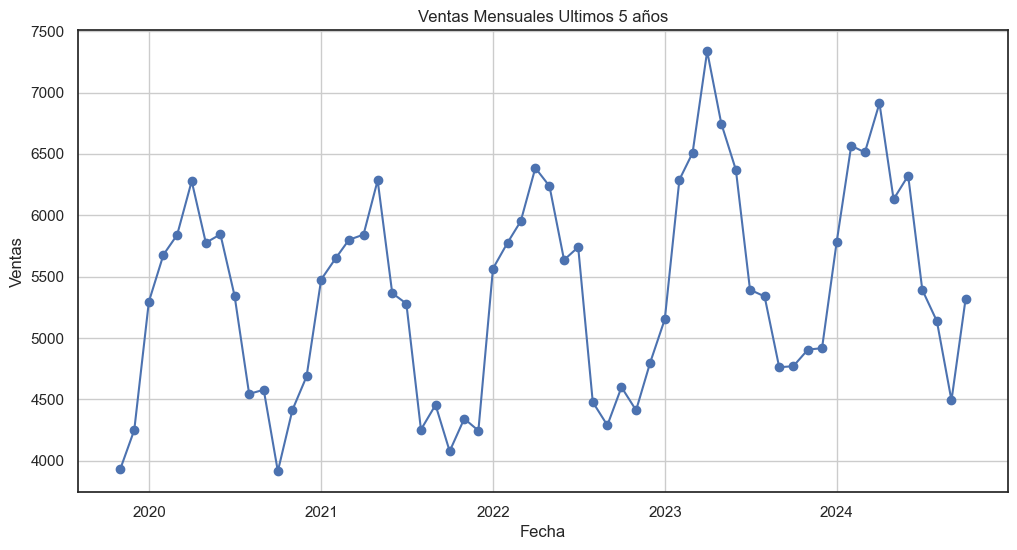

In [3]:
plt.figure(figsize=(12,6))
plt.plot(sales.index, sales['Ventas'], marker='o')
plt.title('Ventas Mensuales Ultimos 5 años')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [4]:
train_size = int(0.8 * len(sales))
train_df = sales[:train_size]
test_df = sales[train_size:]

In [5]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='M',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=True,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2                # Nivel de verbosidad
)

Start of Fit.....
    Target variable given as = Ventas
Start of loading of data.....
    Inputs: ts_column = Fecha, sep = ,, target = ['Ventas']
    Using given input: pandas dataframe...
    train time series Fecha column is the index on test data...
    train data shape = (48, 1)
Alert: Could not detect strf_time_format of Fecha. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


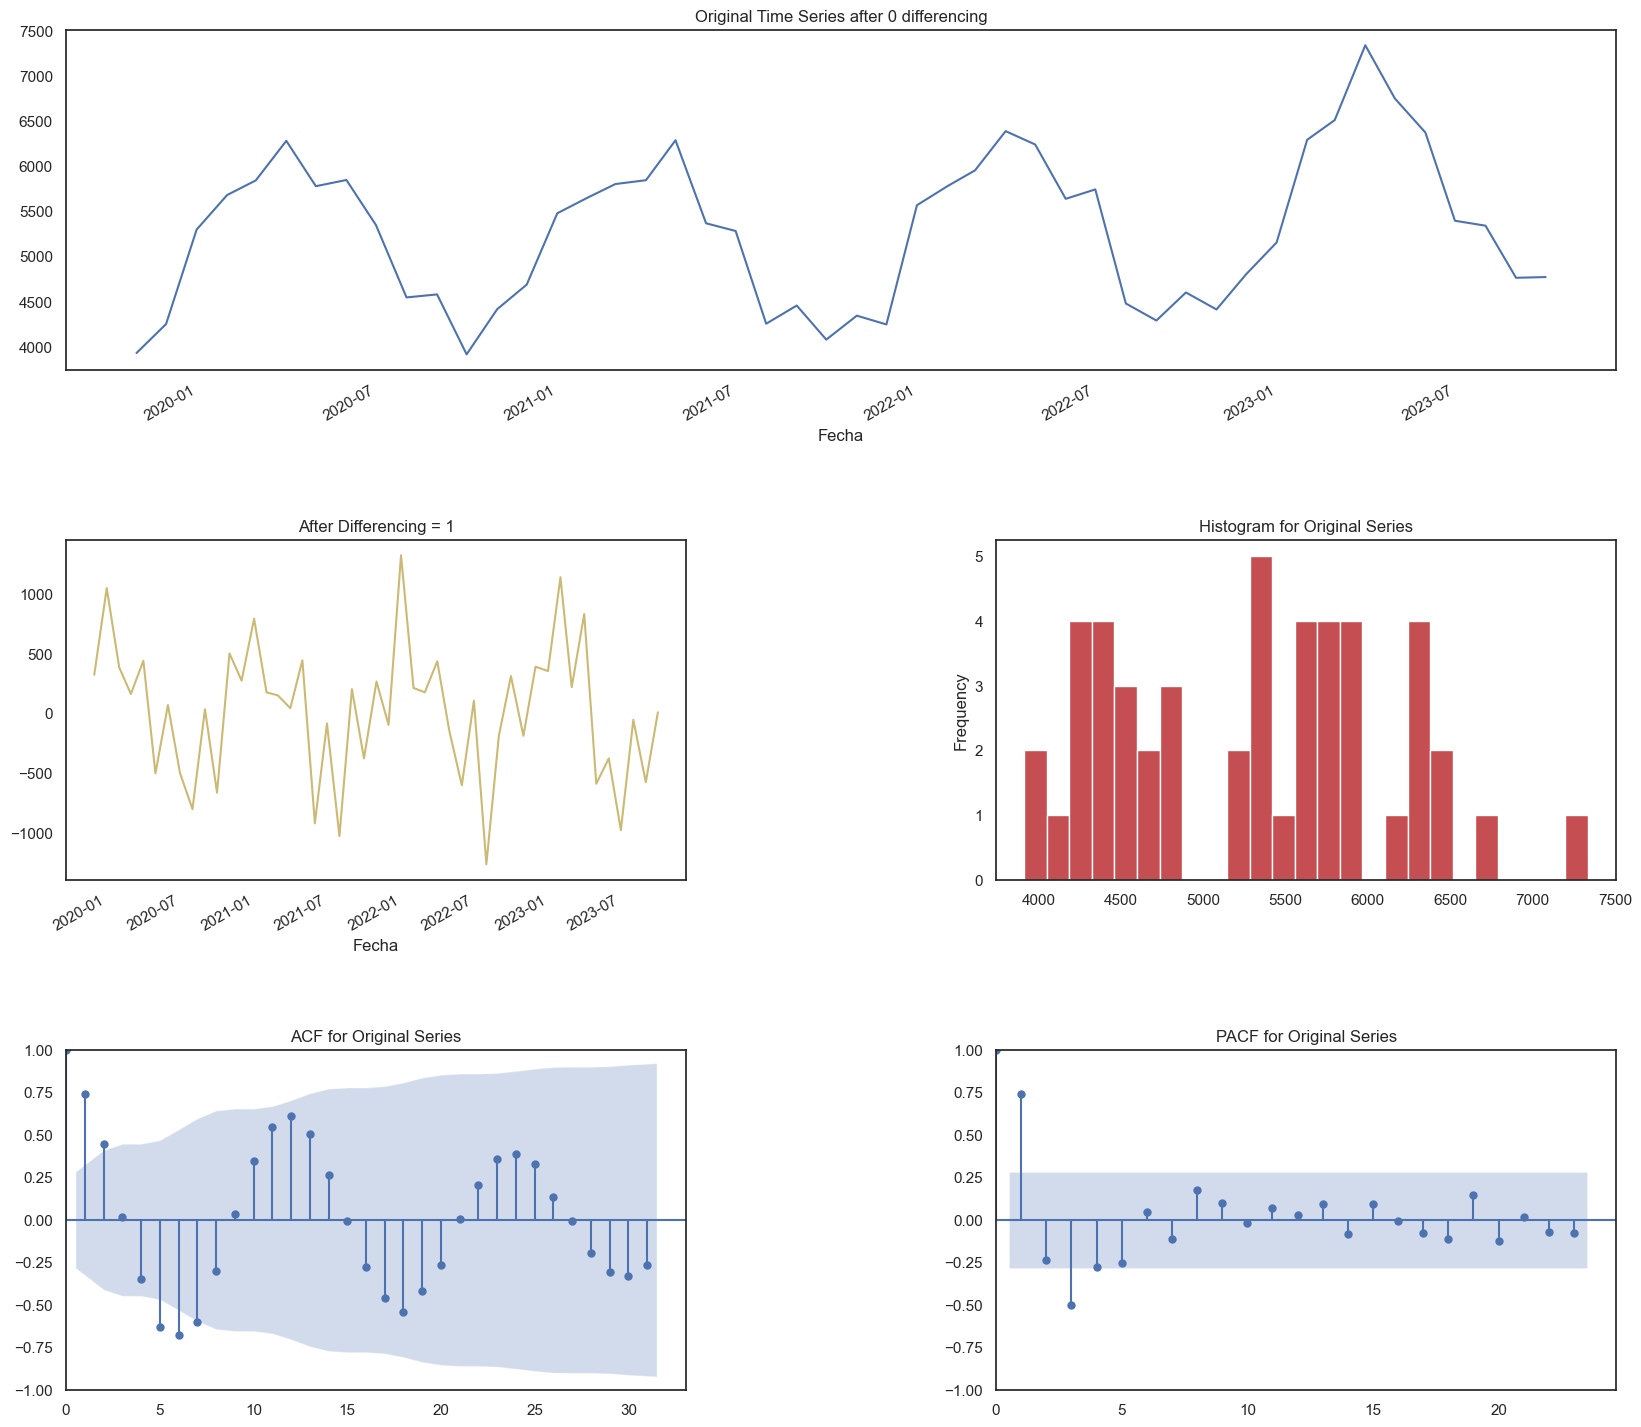

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(48, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 23 Test Shape: 5


20:31:24 - cmdstanpy - INFO - Chain [1] start processing
20:31:24 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 823.24
    Std Deviation of actuals = 718.07
    Normalized RMSE (as pct of std dev) = 115%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 28 Test Shape: 5


20:31:24 - cmdstanpy - INFO - Chain [1] start processing
20:31:25 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 548.33
    Std Deviation of actuals = 285.19
    Normalized RMSE (as pct of std dev) = 192%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 33 Test Shape: 5


20:31:25 - cmdstanpy - INFO - Chain [1] start processing
20:31:26 - cmdstanpy - INFO - Chain [1] done processing
20:31:26 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 270.32
    Std Deviation of actuals = 174.22
    Normalized RMSE (as pct of std dev) = 155%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 38 Test Shape: 5


20:31:27 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 527.24
    Std Deviation of actuals = 717.74
    Normalized RMSE (as pct of std dev) = 73%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 43 Test Shape: 5


20:31:27 - cmdstanpy - INFO - Chain [1] start processing
20:31:28 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 645.32
    Std Deviation of actuals = 586.79
    Normalized RMSE (as pct of std dev) = 110%
Cross Validation window: 5 completed


20:31:28 - cmdstanpy - INFO - Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 501.05
    MSE (Mean Squared Error = 349178.55
    MAPE (Mean Absolute Percent Error) = 10%
    RMSE (Root Mean Squared Error) = 590.9133
    Normalized RMSE (MinMax) = 18%
    Normalized RMSE (as Std Dev of Actuals)= 65%
Time Taken = 5 seconds


20:31:29 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 23 Test Shape: 5

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=163.188, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=166.620, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=161.206, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=165.057, Time=0.20 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=165.141, Time=0.10 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,

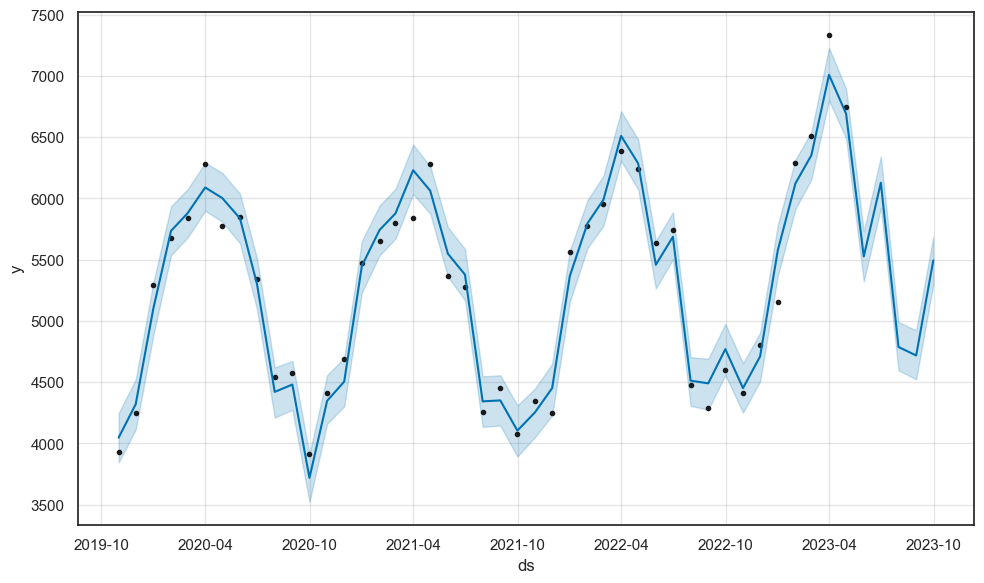

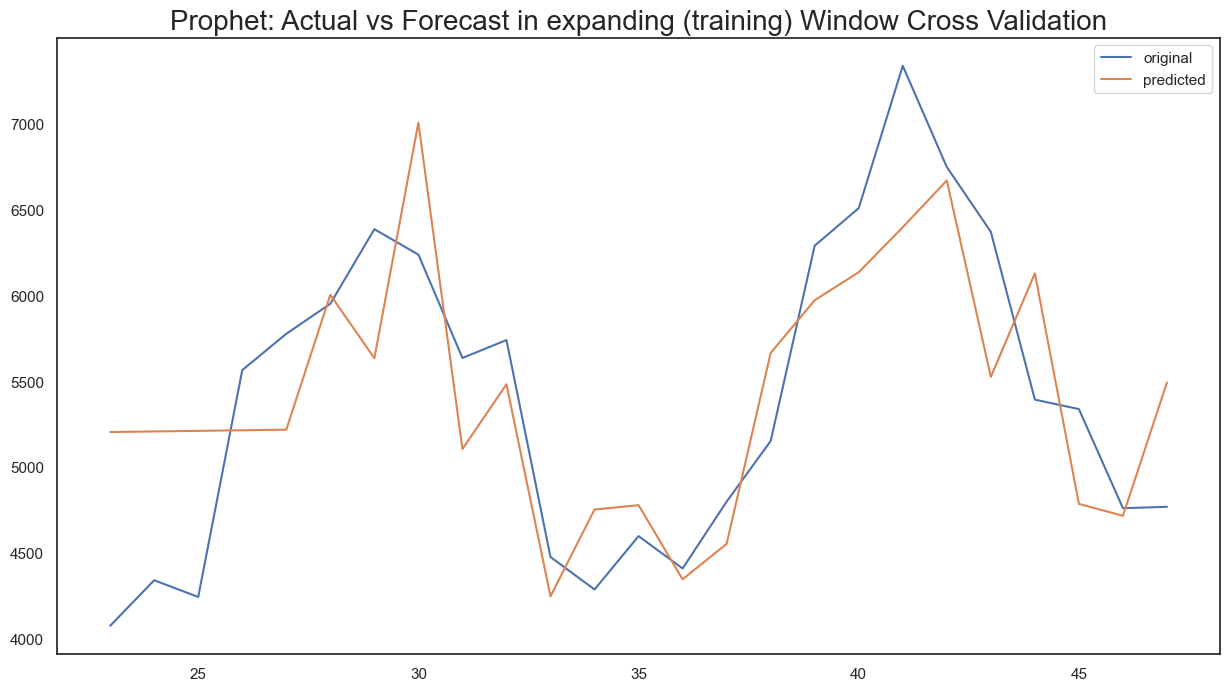

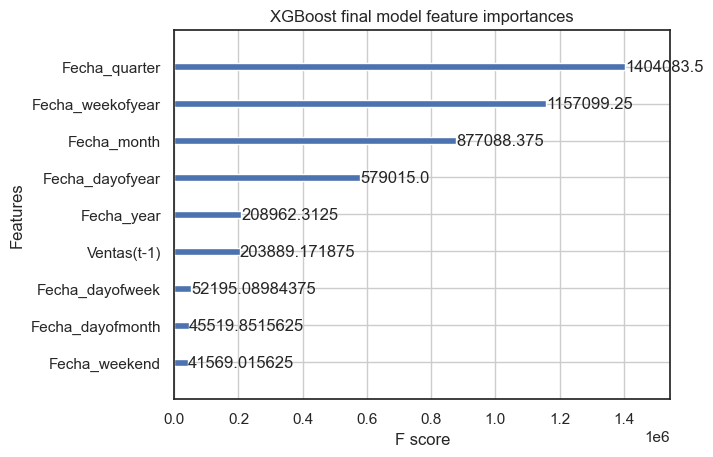

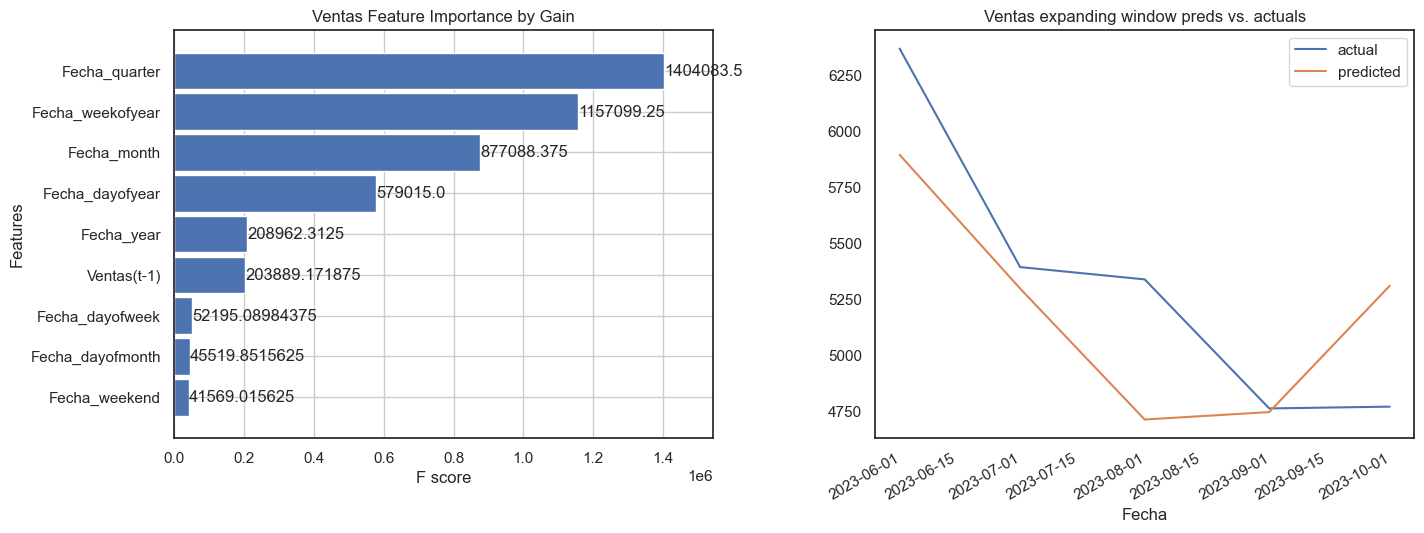

In [6]:
model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='Ventas'
)

In [8]:
forecast = model.predict(testdata=test_df)
forecast.head()

Predicting using test dataframe shape = (12, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Fecha,,,,
2023-10-31 11:48:50.173779,4667.388672,NaN,NaN,NaN
2023-11-30 11:48:50.173779,4744.833984,NaN,NaN,NaN
2023-12-31 11:48:50.173779,5334.534180,NaN,NaN,NaN
2024-01-31 11:48:50.173779,6224.232422,NaN,NaN,NaN
2024-02-29 11:48:50.173779,6538.482422,NaN,NaN,NaN


In [36]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_df['Ventas'], forecast['yhat'], squared=False)
print(f'RMSE del modelo ML de Auto_ts: {rmse:.2f}')

RMSE del modelo ML de Auto_ts: 356.36


## Arima por separado

In [13]:
import pmdarima as pm

model_arima = pm.auto_arima(train_df, 
                      seasonal=True,    # Activar el componente estacional
                      m=12,             # Periodo de estacionalidad (por ejemplo, mensual)
                      stepwise=True,    # Para agilizar la búsqueda del mejor modelo
                      trace=True)       # Para mostrar el proceso de búsqueda

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=540.202, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=521.133, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=519.767, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=521.522, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=521.782, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=538.106, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=519.949, Time=0.19 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=520.636, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=520.036, Time=0.13 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=521.095, T

In [14]:
print(model_arima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -256.884
Date:                            Tue, 22 Oct 2024   AIC                            519.767
Time:                                    20:36:06   BIC                            524.433
Sample:                                10-31-2019   HQIC                           521.378
                                     - 09-30-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7814      0.114     -6.837      0.000      -1.005      -0.557
ma.S.L12      -0.6362      0.584   

In [16]:
forecast_arima = model_arima.predict(n_periods=len(test_df))
forecast_arima.head()

2023-10-31 11:48:50.173779    4883.610150
2023-11-30 11:48:50.173779    5116.487378
2023-12-31 11:48:50.173779    5906.786363
2024-01-31 11:48:50.173779    6499.802171
2024-02-29 11:48:50.173779    6687.621264
Freq: M, dtype: float64

In [27]:
rmse_arima = mean_squared_error(test_df, forecast_arima, squared=False)
print(f'Error cuadrático medio: {rmse_arima:.2f}')

Error cuadrático medio: 383.38


In [28]:
rmse, rmse_arima

(356.3622913423449, 383.384708139233)

### El modelo con menor RMSE es el de ML de Auto_ts, por lo tanto se usa ese pronóstico

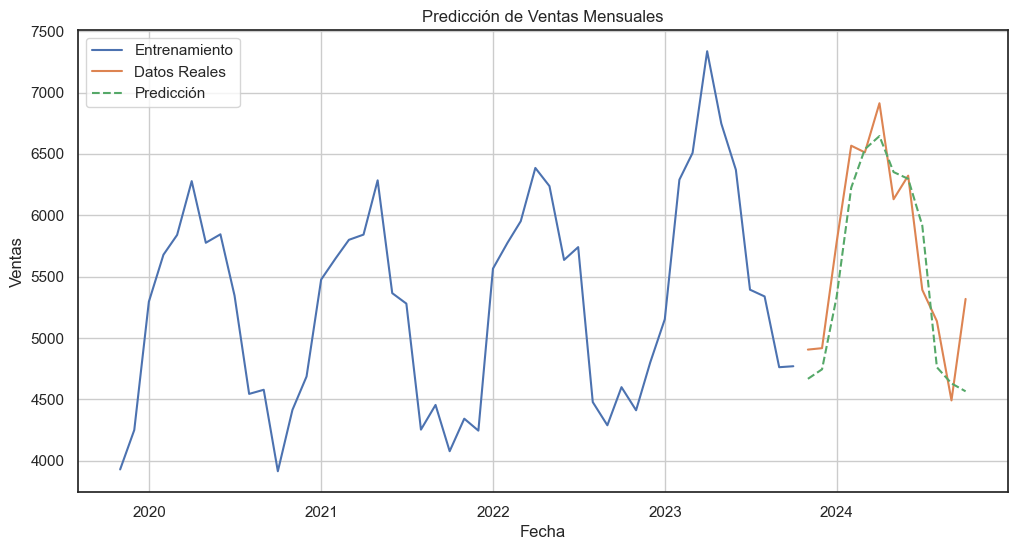

In [32]:
plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
plt.plot(test_df.index, test_df['Ventas'], label='Datos Reales')
plt.plot(test_df.index, forecast['yhat'], label='Predicción', linestyle='--')
plt.title('Predicción de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

## Proyección al futuro 

Predicting using test dataframe shape = (12, 0) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
    converting testdata to datetime index erroring. Please check input and try again.
ML predictions completed


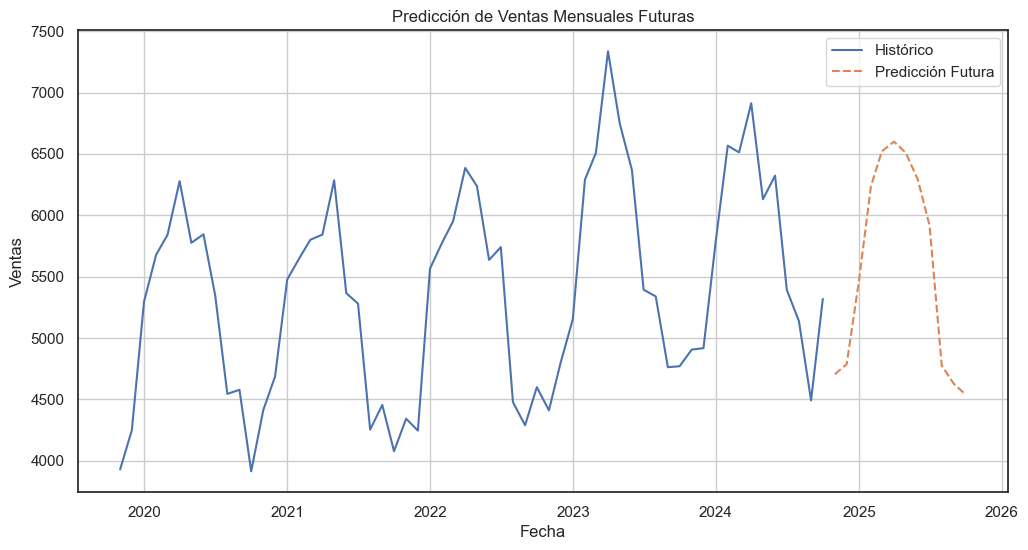

In [35]:
future_periods = 12
last_date = sales.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')

future_df = pd.DataFrame(index=future_dates)
future_forecast = model.predict(testdata=future_df)

plt.figure(figsize=(12,6))
plt.plot(sales.index, sales['Ventas'], label='Histórico')
plt.plot(future_dates, future_forecast['yhat'], label='Predicción Futura', linestyle='--')
plt.title('Predicción de Ventas Mensuales Futuras')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

La proyección sigue la estacionalidad de los periodos anteriores. Se espera que las ventas de los meses que son los mas altos del año sean mas bajas a las de los 2 años anteriores, es decir, va a ir a la baja en el futuro

# Pregunta 2

### Pregunta 2: Modelado de Ecuaciones Estructurales (SEM)
Objetivo: ShopEase quiere entender mejor cómo los diferentes factores de satisfacción del cliente (tiempo de respuesta, calidad del producto y probabilidad de recomendación) afectan el valor total esperado de vida de un cliente (LTV).

Instrucciones:
- Utiliza el archivo customer_satisfaction_data.csv que contiene los indicadores de satisfacción del cliente.
- Define las siguientes relaciones en un modelo SEM:
    - Confianza del cliente como variable latente, medida por el tiempo de respuesta, calidad del producto, y probabilidad de recomendación.
- Ajusta el modelo y explica los coeficientes de las relaciones entre las variables.
- Proporciona conclusiones sobre larelación que tiene la satisfacción del cliente con el valor de vida del cliente en ShopEase.

In [37]:
customer = pd.read_csv('customer_satisfaction_data.csv')
customer.head()

,Tiempo_Respuesta,Calidad_Producto,Probabilidad_Recomendacion,LTV
0,7.993428,9.389266,7.402641,1156.97
1,6.723471,10.000000,7.562898,1324.58
2,8.295377,5.902149,5.911942,711.72
3,10.000000,8.844454,4.330033,899.99
4,6.531693,7.024036,7.432377,941.69


In [38]:
model_desc = """
# Latent Variables
Confianza =~ Tiempo_Respuesta + Calidad_Producto + Probabilidad_Recomendacion
"""

mod = Model(model_desc)
res_opt = mod.fit(customer)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

                         lval  op                        rval  Estimate  \
0            Tiempo_Respuesta   ~                   Confianza  1.000000   
1            Calidad_Producto   ~                   Confianza -0.104282   
2  Probabilidad_Recomendacion   ~                   Confianza -1.027409   
3                   Confianza  ~~                   Confianza  1.799171   
4            Calidad_Producto  ~~            Calidad_Producto  1.778122   
5  Probabilidad_Recomendacion  ~~  Probabilidad_Recomendacion  0.172372   
6            Tiempo_Respuesta  ~~            Tiempo_Respuesta  1.514249   

   Std. Err    z-value   p-value  
0         -          -         -  
1  0.046647  -2.235553  0.025381  
2  0.425274  -2.415875  0.015697  
3  0.764083   2.354681  0.018539  
4  0.112747  15.770952       0.0  
5  0.782251   0.220354  0.825595  
6  0.747162   2.026668  0.042696  


In [39]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 22
Params: -0.104 -1.027 1.778 1.799 0.172 1.514


## Conclusión de coeficientes

- **Tiempo de respuesta:** Por cada unidad de Tiempo de resupuesta que se aumente, la confianza del cliente va a aumentar en 1 unidad.
- **Calidad de producto:** Por cada unidad de Calidad de producto que se aumente, la confianza del cliente se va a reducir en 0.104282 unidades. Lo que significa que la calidad se relaciona negativamente con la confianza.
- **Probabilidad de recomendación:** Por cada unidad de Probabilidad de recomendación que se aumente, la confianza del cliente se va a reducir en 1.027409 unidades. Lo que significa que la Probabilidad de recomendación se relaciona negativamente con la confianza.

Los resultados parecen ser que no hacen sentido, porque si aumento la calidad, debería de aumentar la confianza en lugar de reducirla, por lo tanto, la variable que se calculó hace mas sentido a la desconfianza y no a la confianza.

In [63]:
g = semplot(mod, 'pd.png')

<img src="pd.png">

## Estandarizar datos 

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

customer_std = scaler.fit_transform(customer[['Tiempo_Respuesta', 'Calidad_Producto', 'Probabilidad_Recomendacion']])
customer_std = pd.DataFrame(customer_std, columns=['Tiempo_Respuesta', 'Calidad_Producto', 'Probabilidad_Recomendacion'])
customer_std.head()

,Tiempo_Respuesta,Calidad_Producto,Probabilidad_Recomendacion
0,0.573365,1.052019,0.558383
1,-0.124230,1.507515,0.669697
2,0.739227,-1.548738,-0.477060
3,1.675587,0.645688,-1.575856
4,-0.229575,-0.712013,0.579037


## Confianza 

In [60]:
confianza_factors = [1.0, -0.104, -1.027]  # Tiempo_Respuesta, Calidad_Producto, Probabilidad_Recomendacion


# Función para calcular el valor de la variable latente
def calculate_latent_values(df):
    # Calcular Confianza como la suma ponderada de Uso, Seguridad y Recomendaciones
    df['Desconfianza'] = (df['Tiempo_Respuesta'] * confianza_factors[0] +
                       df['Calidad_Producto'] * confianza_factors[1] +
                       df['Probabilidad_Recomendacion'] * confianza_factors[2])
    return df[['Desconfianza']]

latent_values = calculate_latent_values(customer_std)
latent_values.head()

,Desconfianza
0,-0.109504
1,-0.968791
2,1.390236
3,3.226840
4,-0.750196


Text(0, 0.5, 'Desconfianza')

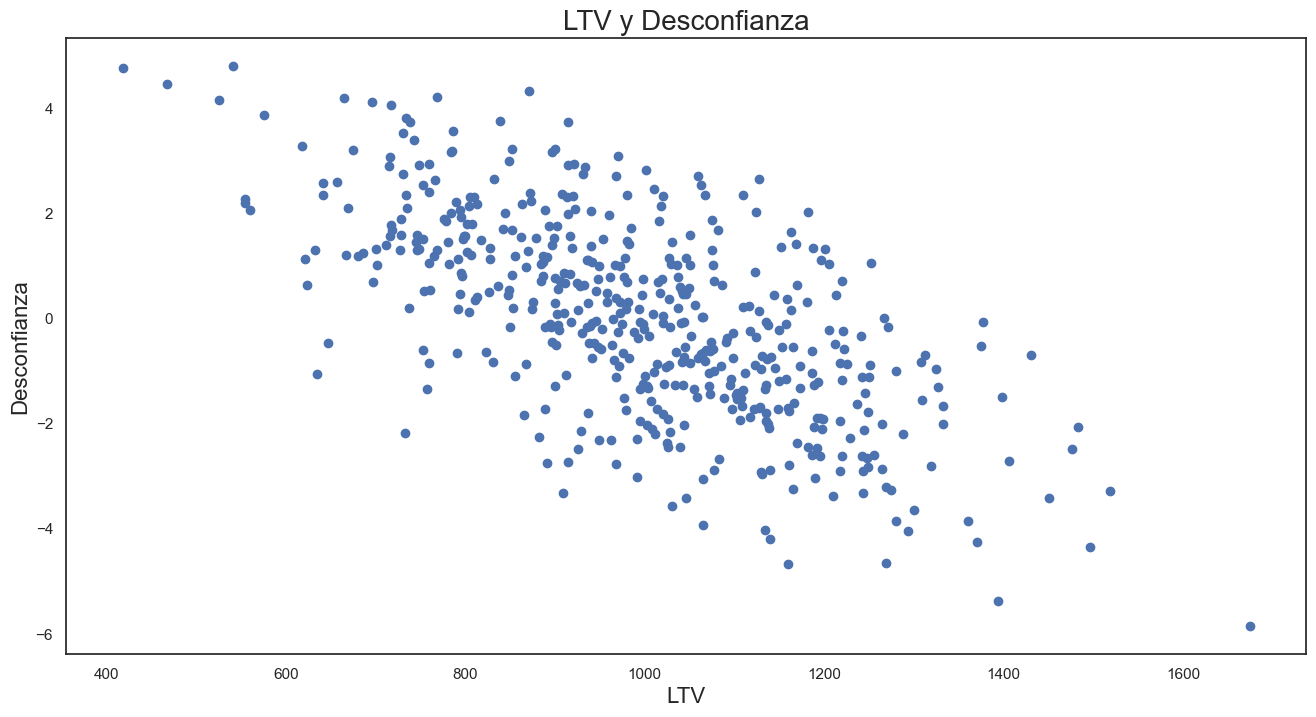

In [61]:
plt.figure(figsize=(16, 8))
plt.scatter(customer['LTV'], latent_values['Desconfianza'])
plt.title('LTV y Desconfianza', fontsize=20)
plt.xlabel('LTV', fontsize=16)
plt.ylabel('Desconfianza', fontsize=16)

## Conclusión

Recordando que las variables se invirtieron de confianza a desconfianza:
- A menor LTV hay poca confianza.
- A mayor LTV hay mucha confianza.
- Se ve la relación que mientras mas le ingresan a la empresa mayor confianza le tienen a la empresa.